# Дубликаты

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio

In [2]:
pio.renderers.default = 'notebook'

Иногда данные могут содержать повторяющиеся записи (дубликаты).

``Дубликатами`` называются записи, для которых значения (всех или большинства) признаков совпадают. 

Мы уже сталкивались с такой проблемой, когда рассматривали датасет с информацией о фильмах и их рейтингах. В двух таблицах с рейтингами возникали дубликаты, из-за которых мы не могли правильно объединить данные. 

В том случае дубликаты было очень просто найти: это была последняя строка первой и первая строка второй таблиц. Но так бывает не всегда. Иногда дубликаты тщательно скрываются в данных и необходимо приложить немало усилий, чтобы их отыскать.

## Чем опасны дубликаты?

Дублирующаяся информация никогда не приводит ни к чему хорошему. В Data Science одинаковые записи не несут полезной информации и искажают реальную статистику. Модель несколько раз видит одно и то же наблюдение и начинает подстраиваться под него. Если дубликатов много, это может стать большой проблемой при обучении.

## Обнаружение и ликвидация дубликатов

Способ обнаружения дубликатов зависит от того, что именно вы считаете дубликатом. Например, за дубликаты можно посчитать записи, у которых совпадают все признаки или их часть. Если в таблице есть столбец с уникальным идентификатором (id), вы можете попробовать поискать дубликаты по нему: одинаковые записи могут иметь одинаковый id.

✍️ Проверим, есть у нас такие записи: для этого сравним число уникальных значений в столбце id с числом строк. Число уникальных значений вычислим с помощью метода ``nunique()``:

In [3]:
sber_data = pd.read_csv('data/sber_data.csv')
sber_data

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,mosque_count_1000,price_doc
0,1,43,27.0,4.0,Bibirevo,5001.0,5,11065.0,5,0,...,0.637189,0.947962,0.177975,0.625783,0.628187,14.053047,7.389498,good,0,5850000
1,2,34,19.0,3.0,Nagatinskij Zaton,3119.0,5,6237.0,8,0,...,0.688796,1.072315,0.273345,0.967821,0.471447,6.829889,0.709260,excellent,0,6000000
2,3,43,29.0,2.0,Tekstil'shhiki,1463.0,4,5580.0,7,0,...,1.543049,0.391957,0.158072,3.178751,0.755946,4.273200,3.156423,poor,0,5700000
3,4,89,50.0,9.0,Mitino,6839.0,9,17063.0,10,0,...,0.934273,0.892674,0.236455,1.031777,1.561505,16.990677,16.041521,good,0,13100000
4,5,77,77.0,4.0,Basmannoe,3240.0,7,7770.0,9,0,...,0.077901,0.810801,0.376838,0.378756,0.121681,1.112486,1.800125,excellent,0,16331452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,30469,44,27.0,7.0,Otradnoe,5088.0,4,12721.0,4,0,...,1.103579,0.167718,0.349899,1.235066,0.612359,7.482165,4.836787,good,0,7400000
30467,30470,86,59.0,3.0,Tverskoe,1874.0,4,6772.0,4,1,...,0.069986,0.086552,0.362681,0.850385,0.310021,0.778428,1.450108,poor,0,25000000
30468,30471,45,NaN,10.0,Poselenie Vnukovskoe,NaN,0,NaN,0,0,...,4.338453,1.339078,1.234235,1.192543,1.186621,13.459593,9.890758,no data,0,6970959
30469,30472,64,32.0,5.0,Obruchevskoe,2372.0,6,6083.0,8,0,...,1.204798,1.340017,0.130667,1.644053,0.476021,2.088193,4.119706,satisfactory,0,13500000


In [4]:
sber_data['id'].nunique() == sber_data.shape[0]

True

Вроде бы всё в порядке: каждой записи в таблице соответствует свой уникальный идентификатор. Но это ещё не означает, что в таблице нет дубликатов! Столбец с ``id`` задаёт каждой строке свой уникальный номер, поэтому сама по себе каждая строка является уникальной. Однако содержимое других столбцов может повторяться.

Чтобы отследить дубликаты, можно воспользоваться методом ``duplicated()``, который возвращает булеву маску для фильтрации. Для записей, у которых совпадают признаки, переданные методу, он возвращает ``True``, для остальных — ``False``.
У метода есть параметр ``subset`` — список признаков, по которым производится поиск дубликатов. По умолчанию используются все столбцы в DataFrame и ищутся полные дубликаты.

✍️ Найдём число полных дубликатов таблице ``sber_data``. Предварительно создадим список столбцов dupl_columns, по которым будем искать совпадения (все столбцы, не включая id). 
Создадим маску дубликатов с помощью метода ``duplicated()`` и произведём фильтрацию. Результат заносим в переменную ``sber_duplicates``. Выведем число строк в результирующем DataFrame:

In [5]:
dupl_columns = list(sber_data.columns)
dupl_columns.remove('id')

mask = sber_data.duplicated(subset=dupl_columns)
sber_duplicates = sber_data[mask]
print(f'Число найденных дубликатов: {sber_duplicates.shape[0]}')

Число найденных дубликатов: 562


Итак, 562 строки в таблице являются полными копиями других записей. Ручной поиск совпадающих строк по 30 тысячам записей был бы практически невыполним, а с помощью pandas мы быстро, а главное, легко обнаружили дублирующиеся данные!

Теперь нам необходимо от них избавиться. Для этого легче всего воспользоваться методом ``drop_duplicates()``, который удаляет повторяющиеся записи из таблицы. 
✍️ Создадим новую таблицу ``sber_dedupped``, которая будет версией исходной таблицы, очищенной от полных дубликатов.

In [6]:
sber_dedupped = sber_data.drop_duplicates(subset=dupl_columns)
print(f'Результирующее число записей: {sber_dedupped.shape[0]}')

Результирующее число записей: 29909


## Неинформативные признаки

Отсутствием новой и полезной информации могут «похвастаться» не только отдельные записи в таблице, но и целые признаки.

``Неинформативными`` называются признаки, в которых большая часть строк содержит одинаковые значения (например, пол клиентов в мужском барбершопе), либо наоборот — признак, в котором для большинства записей значения уникальны (например, номер телефона клиента). 

Мы уже сталкивались с неинформативными признаками. Вспомните датасет о домах в Мельбурне, где был признак адреса дома с уникальным значением для каждого дома. 

### Чем они опасны?

Такие признаки не играют роли при моделировании и лишь засоряют таблицу, увеличивая размерность данных. Они усиливают уже знакомое нам проклятие размерности, которое увеличивает время обучения модели и потенциально может снизить ее качество. 

### Обнаружение и ликвидация

Чтобы считать признак неинформативным, прежде всего нужно задать какой-то определённый порог. Например, часто используют пороги в 0.95 и 0.99. Это означает: признак неинформативен, если в нем 95 % (99 %) одинаковых значений или же 95 % (99 %) данных полностью уникальны.

К сожалению, в pandas пока нет волшебной палочки, которая мгновенно бы выдавала список столбцов, обладающих низкой информативностью. Однако процедура их поиска легко реализуется вручную.

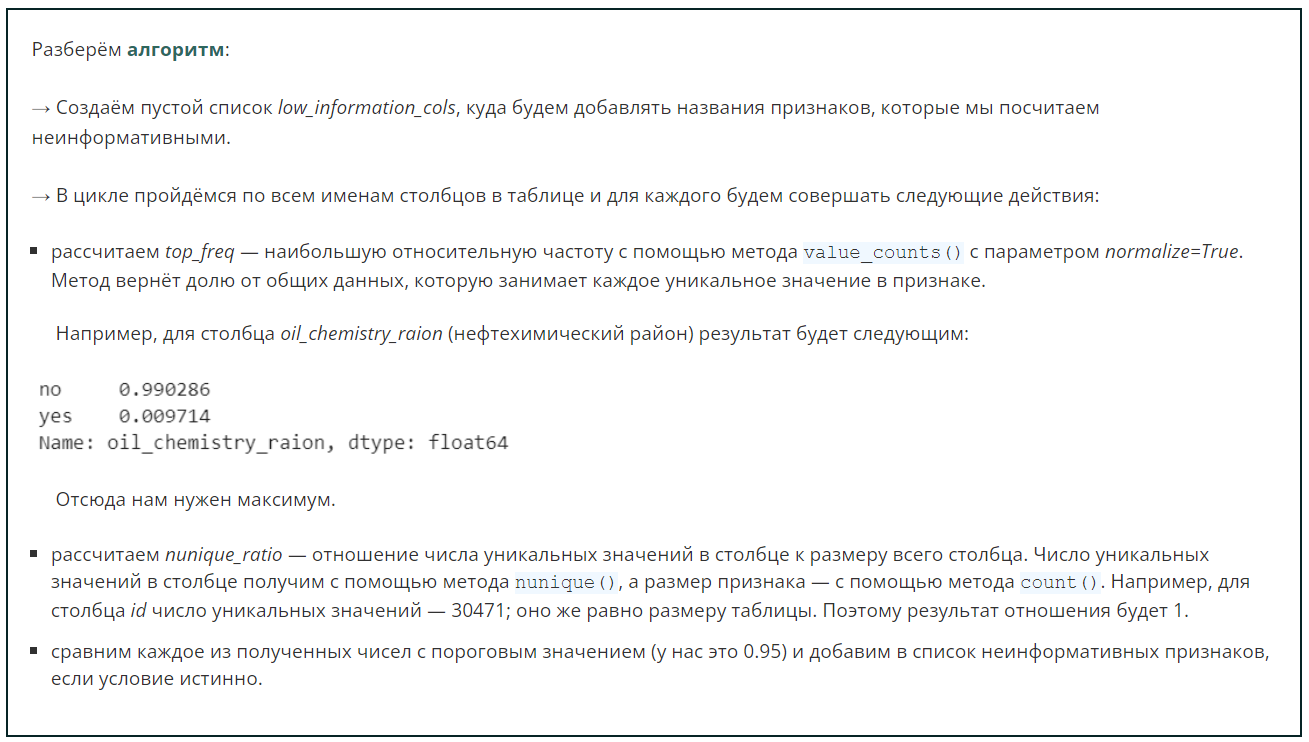

In [7]:
#список неинформативных признаков
low_information_cols = [] 

#цикл по всем столбцам
for col in sber_data.columns:
    #наибольшая относительная частота в признаке
    top_freq = sber_data[col].value_counts(normalize=True).max()
    #доля уникальных значений от размера признака
    nunique_ratio = sber_data[col].nunique() / sber_data[col].count()
    # сравниваем наибольшую частоту с порогом
    if top_freq > 0.95:
        low_information_cols.append(col)
        print(f'{col}: {round(top_freq*100, 2)}% одинаковых значений')
    # сравниваем долю уникальных значений с порогом
    if nunique_ratio > 0.95:
        low_information_cols.append(col)
        print(f'{col}: {round(nunique_ratio*100, 2)}% уникальных значений')

id: 100.0% уникальных значений
oil_chemistry_raion: 99.03% одинаковых значений
railroad_terminal_raion: 96.27% одинаковых значений
nuclear_reactor_raion: 97.17% одинаковых значений
big_road1_1line: 97.44% одинаковых значений
mosque_count_1000: 98.08% одинаковых значений


Итак, мы нашли шесть неинформативных признаков. Теперь можно удалить их с помощью метода ``drop()``, передав результирующий список в его аргументы.

In [8]:
information_sber_data = sber_data.drop(low_information_cols, axis=1)
print(f'Результирующее число признаков: {information_sber_data.shape[1]}')

Результирующее число признаков: 55


``Однако всегда следует скептически относиться к результатам, которые предоставил алгоритм поиска неинформативных признаков. В противном случае можно лишиться важных данных.``

``Например, в ваших данных есть признак цены акций, которая всё время меняется. В каждый момент времени её цена уникальна, то есть число уникальных значений в столбце совпадает с размером столбца. Казалось бы, по критерию информативности это кандидат на выбывание, но если мы рассматриваем задачу предсказания спроса на эти самые акции, то очевидно, что цена — это очень важный фактор, несмотря на свою уникальность. Именно цена на акции определяет спрос на них.``

``Могут возникнуть ситуации, когда присутствует огромная разница в частотах для каждого уникального значения в столбце, но это вовсе не значит, что признак неинформативен. Например, у нас могут быть данные о различных переводах между счетами пользователей. В этих данных может быть очень важный признак мошенничества (два возможных значения — да и нет). Как правило, соотношение между мошенниками и обычными пользователями около — 2/98 % (мошенников 1-2 %, а обычных пользователей — 98-99 %). Но стоит ли удалять данный признак из данных зависит от поставленной перед нами задачи.``

``Будьте внимательны и рассудительны при поиске неинформативных признаков. Лучшее решение — для начала использовать все признаки для построения базовой модели, а затем уже выбирать те, которые обладают наибольшей информативностью.``

``Более подробно мы рассмотрим данные нюансы в блоке по машинному обучению.``

## Важность признаков

На самом деле информативность признаков определяется не только числом уникальных значений, но и их влиянием на целевой признак (тот, который мы хотим предсказать). Это называется важностью признака. 

Признаки, которые обладают низкой важностью, называют нерелевантными признаками. 

Например, если бы в наших данных о квартирах был признак, содержащий информацию о температуре воздуха за окном, он был бы нерелевантным.

Нерелевантные признаки могут быть не такими очевидными. В таких случаях применяются более сложные способы их поиска с использованием статистики и моделей машинного обучения. Мы поговорим об этом позже, когда вплотную подойдём к Machine Learning.